In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation

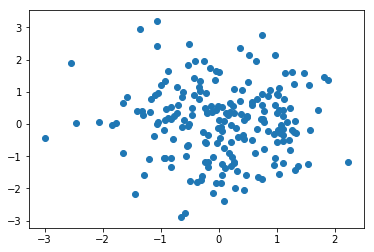

In [7]:
data = np.random.randn(200, 2)
plt.scatter(data[:,0],data[:,1])

In [17]:
def BMU(som, vec):
    dist = numpy.sqrt( numpy.square(som - vec).sum(2) )
    H = som.shape[1]
    v,h = divmod(dist.argmin(), H)
    return (v,h)


array([-1.11888848,  1.06577478])

In [44]:
def plot_res():
    plt.scatter(data[:,0], data[:,1])
    plt.scatter(som[:, 0], som[:, 1])

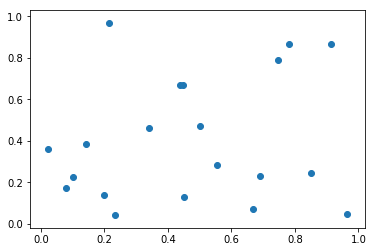

In [23]:
som = np.random.rand(20, 2)

fig = plt.figure()
ax = fig.add_subplot(111)

line = ax.scatter(som[:, 0], som[:, 1])

gamma = 30
lr = 0.999

def animate(i):
    vec = data[np.random.choice(len(data)),:]
        
    dist = np.sqrt(np.square(som - vec).sum(axis=1)) 
    move = vec - som

    scale = 1/dist.reshape(-1, 1)
    off = move * scale
#     som += + off
#     gamma *= lr

    line.set_offsets(som)
    return line,


ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), interval=25)
HTML(ani.to_html5_video())

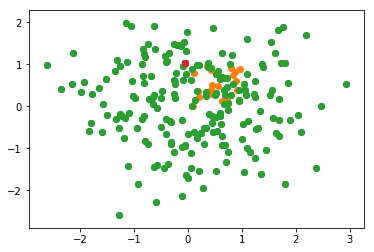

In [45]:
som = np.random.rand(20, 2)

plot_res()

for i in range(10):
    lr = 0.999    
    gamma = 30
    
    while gamma > 1:
        vec = data[np.random.choice(len(data)),:]
        
        dist = np.sqrt(np.square(som - vec).sum(axis=1)) 
        move = vec - som
        
        scale = 1/dist.reshape(-1, 1)
        off = move * scale
        som = som + off
        gamma *= lr
        
plot_res()

In [ ]:
    som = numpy.random.random_sample((int(sys.argv[2]),int(sys.argv[2]),3))
    som = iteration(data, som, 30, 0.999)
    somImg = draw(som)
    somImg.show()

    
def iteration(data, som, gamma_init, rate):
    gamma = gamma_init
    i = 1
    while gamma &gt; 1:
        vec = trainingsVec(data)
        bmu = BMU(som, vec)
        som = SOM_update(som, vec, gamma, bmu)
        gamma *= rate
        i += 1
    return som

In [ ]:

def trainingsVec(data):
    V,H,c = data.shape
    y = int(H*numpy.random.rand())
    x = int(V*numpy.random.rand())
    return data[x,y]

def BMU(som, vec):
    dist = numpy.sqrt( numpy.square(som - vec).sum(2) )
    H = som.shape[1]
    v,h = divmod(dist.argmin(), H)
    return (v,h)

def SOM_update(som, vec, gamma, bmu):
    V, H, n = som.shape
    ind = numpy.indices((V,H))
    ind[0] -= bmu[0]
    ind[1] -= bmu[1]
    dist = numpy.sqrt(numpy.square(ind[0]) + numpy.square(ind[1]))
    mask = numpy.less(dist, gamma).astype(float)
    mask *= 0.01  # weight
    mask = numpy.multiply.outer(mask, numpy.ones(n,int))
    som += mask * (vec - som)
    return som


def mapping(data, som):
    V,H,n = data.shape
    arr = numpy.zeros((V,H,n), numpy.uint8)
    for i in range(V):
        for j in range(H):
            vec = data[i,j]
            bmu = BMU(som, vec)
            arr[i,j] = som[bmu[0], bmu[1]]
    img = draw(arr)
    return img


if __name__ == "__main__":
    data = readImage(sys.argv[1])
    origImg = draw(data)
    origImg.show()
    
    som = numpy.random.random_sample((int(sys.argv[2]),int(sys.argv[2]),3))
    som = iteration(data, som, 30, 0.999)
    somImg = draw(som)
    somImg.show()

    mapImg = mapping(data, som)
    mapImg.show()

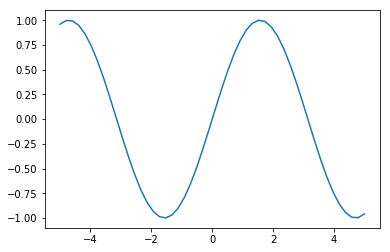

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)

def anim(i):
    x = np.linspace(-5, 5) + i

    ax.clear()
    ax.plot(x, np.sin(x))
    

ani = animation.FuncAnimation(fig, anim)
plt.show()

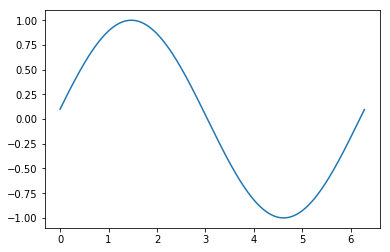

In [8]:
from IPython.display import HTML
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
#     plt.plot(np.sin(x + i/10.0))
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), interval=25)
HTML(ani.to_html5_video())